In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from astropy.table import Table
t = Table.read('adjusted.fits', format='fits')

In [14]:
print(t)

     Source_Name            Total_flux     ...         z_best       
---------------------- ------------------- ... ---------------------
ILTJ144959.18+552910.9  0.8990734118847026 ...                0.4855
ILTJ144946.61+553941.1  0.7114044731470365 ...                1.7363
ILTJ144716.91+551310.6  0.6295416322224788 ...                 0.647
ILTJ145245.58+560418.6  1.1322565355821288 ...                0.4122
ILTJ144045.22+535612.2  0.8354977412032033 ...                1.5169
ILTJ145436.71+563221.5  0.8348111547045913 ...                0.9048
ILTJ145617.99+563559.9  1.0357284621854421 ...                 0.436
ILTJ144645.07+545017.0  0.5787872031722028 ...   0.11775881052017212
ILTJ144710.33+551431.5  0.5488264585863913 ...                0.3664
ILTJ144543.26+545247.0 0.48434979389836924 ...                0.6533
                   ...                 ... ...                   ...
ILTJ115147.61+484059.3   37.28858495630975 ... 0.0032425837125629187
ILTJ113349.29+530733.5   97.784444

In [15]:
hdul = fits.open('adjusted.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band

In [16]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [36]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm
Lum_dG = array(cosmo.luminosity_distance([Flux_g])*3.08567758e24) ### Last number converts it into cm

In [38]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-23/(1+z))
    return P
Pw22 = (power(Lum_d,Flux_22,z))
Pw = (power(Lum_d,flux_tot,z)*(1+z)**(-0.7))
Pw_g  = (power(Lum_dG,Flux_g,z))

In [24]:
adj = np.where(Pw22>=4e43)
adj1 = np.where(Pw>=4e43)
Pw_adj = array((Pw22[adj])) # This is the luminosity at 22 microns
Pw_adj1 = array((Pw[adj])) # This is the luminosity at 151 MHz

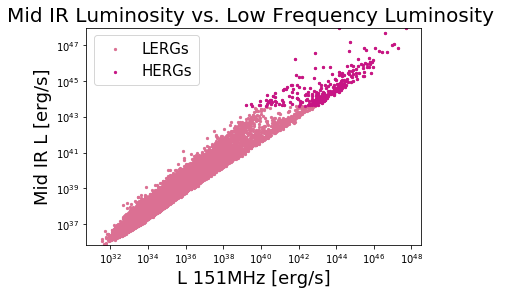

In [25]:
#Limit=[]
#for j in range(len(Pw)):
    #Limit.append(4e43)

    
#logPlot = plt.gca()
#logPlot.loglog(Pw,Limit,'r--',c='black')
plt.scatter(Pw, Pw22,s =5, c='palevioletred',label='LERGs')
plt.scatter(Pw_adj1 ,Pw_adj ,s =5 ,c='mediumvioletred',label='HERGs')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0,1e48)
plt.title('Mid IR Luminosity vs. Low Frequency Luminosity ',fontsize = 20)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('L 151MHz [erg/s]', fontsize = 18)
plt.ylabel('Mid IR L [erg/s]', fontsize = 18)
plt.show()

In [26]:
## Convert erg to J >>> WHz^-1
L_low_f = Pw_adj1*1e-10
L_mid_IR = Pw_adj*1e-10

z_new  = z[:287,]

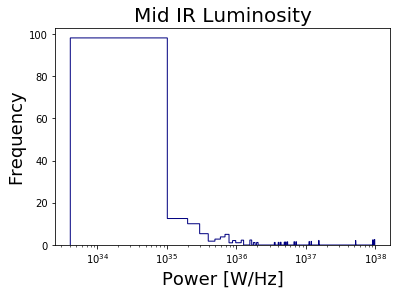

In [37]:
import plotly.plotly as py
plt.hist(L_mid_IR, weights = z_new, color= "navy", bins = 1000, histtype = 'step')
plt.title("Mid IR Luminosity", fontsize = 20)
plt.xlabel("Power [W/Hz]", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0,1e37)
rwidth=20
fig = plt.gcf()

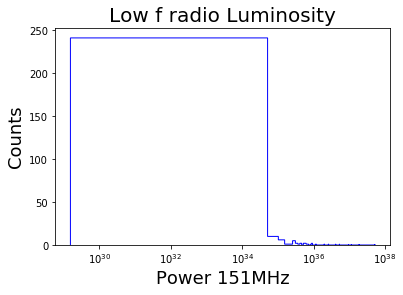

In [28]:
plt.hist(L_low_f, color= "blue", bins = 1000,histtype = 'step')
plt.title("Low f radio Luminosity", fontsize = 20)
plt.xlabel("Power 151MHz", fontsize= 18)
plt.ylabel("Counts", fontsize = 18)
plt.xscale('log')
#plt.xlim(1e34,1e36)
rwidth=50
fig = plt.gcf()

In [29]:
#Pw_adj.tolist()
z_new  = z[:287,]
L_low_f.sort()
z_new.sort()
L_mid_IR.sort()

Text(0,0.5,'Power [W$Hz^-1$]')

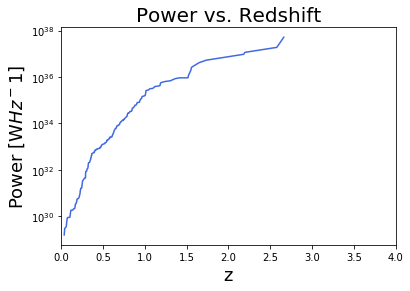

In [30]:
plt.plot(z_new,L_low_f,c='royalblue')
plt.xlim(0,4)
plt.yscale('log')
plt.title('Power vs. Redshift',size=20)
plt.xlabel("z",size=18)
plt.ylabel("Power [W$Hz^-1$]",size=18)

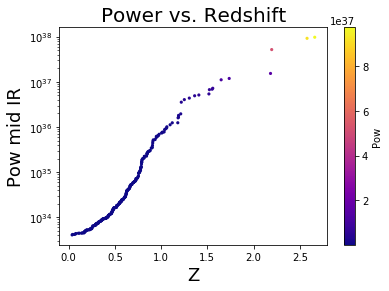

In [31]:
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal

val = plt.scatter(z_new,L_mid_IR, c=L_mid_IR,s=10, marker='o', cmap=cm.plasma, lw=0)
#plt.xlim(0,4)
#plt.ylim(0,1e40)
plt.title('Power vs. Redshift',fontsize = 20)
plt.xlabel('Z', fontsize = 18)
plt.ylabel('Pow mid IR', fontsize = 18)
plt.yscale('log')
cbar = plt.colorbar(val)

cbar.ax.set_ylabel('Pow')
plt.show()

In [32]:
a  = np.log10(1+z)

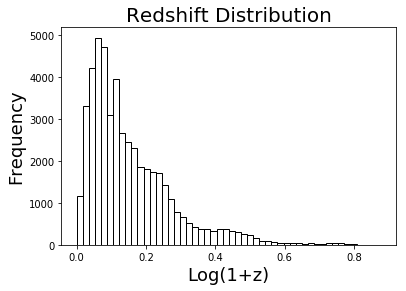

In [33]:
plt.hist(a, color= "navy", bins = 50, fill = False)
plt.title("Redshift Distribution", fontsize = 20)
plt.xlabel("Log(1+z)", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
#plt.xscale('log')
#plt.yscale('log')
rwidth=10
fig = plt.gcf()

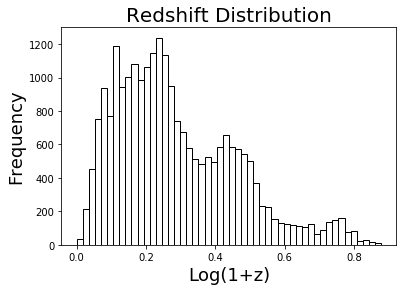

In [34]:
plt.hist(a, weights = z, color= "navy", bins = 50, fill = False)
plt.title("Redshift Distribution", fontsize = 20)
plt.xlabel("Log(1+z)", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
#plt.xscale('log')
#plt.yscale('log')
rwidth=10
fig = plt.gcf()